# 视频人脸表情识别

In [16]:
from keras.models import Sequential
from keras.layers.convolutional import Convolution3D, MaxPooling3D
from tensorflow.keras.optimizers import SGD, RMSprop
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras import backend as K
import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import cv2

In [30]:
image_depth = 8
image_rows = 64
image_columns = 64
train_labels = ['comtempt', 'disgust', 'fear', 'happiness', 'repression',
       'sadness', 'surprise', 'tense']

In [18]:
model = Sequential()
model.add(Convolution3D(8, (3, 3, 15), input_shape=(1, image_depth, image_rows, image_columns), activation='relu', data_format='channels_first'))
model.add(MaxPooling3D(pool_size=(3, 3, 3)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, init='normal', activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(train_labels), init='normal'))
model.add(Activation('softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

C:\Users\Administrator\.conda\envs\python3.6env\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(128, activation="relu", kernel_initializer="normal")`
  '` call to the Keras 2 API: ' + signature)
C:\Users\Administrator\.conda\envs\python3.6env\lib\site-packages\keras\legacy\interfaces.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(8, kernel_initializer="normal")`
  '` call to the Keras 2 API: ' + signature)


In [19]:
model.load_weights('models\\weights-improvement-61-0.54.hdf5')

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_2 (Conv3D)            (None, 8, 6, 62, 50)      1088      
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 2, 2, 20, 50)      0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 2, 2, 20, 50)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4000)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               512128    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 1032      
__________

In [21]:
images = np.load("..\\datasets\\train_images.npy")
labels = np.load("..\\datasets\\train_labels.npy")

images = images.astype('float32')
images -= np.mean(images)
images /= np.std(images)

images_reshape = images.reshape((images.shape[0], 1, images.shape[1], images.shape[2], images.shape[3]))
images_reshape.shape

labels_onehot = np.zeros((len(labels), ), dtype=int)
labels_onehot = np_utils.to_categorical(labels, 8)
labels_onehot.shape

(195, 8)

In [22]:
train_images, validation_images, train_labels, validation_labels =  train_test_split(images_reshape, labels_onehot, test_size=0.2, random_state=4)

In [23]:
predictions = model.predict(validation_images)
predictions_labels = np.argmax(predictions, axis=1)
validation_labels = np.argmax(validation_labels, axis=1)
cfm = confusion_matrix(validation_labels, predictions_labels)
print (cfm)

[[10  0  1  0  0  0  2]
 [ 0  0  0  0  0  0  1]
 [ 0  0  0  1  0  0  0]
 [ 1  0  0  3  0  0  4]
 [ 1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  2]
 [ 3  0  0  2  0  0  8]]


## 读取视频

In [24]:
import matplotlib.pyplot as plt

In [25]:
# 设置处理的视频路径
video_path = '..\\datasets\\test.mp4'

In [31]:
from faceRecognize import FaceRecognize

cap = cv2.VideoCapture(video_path)

faceRecognizer = FaceRecognize()
imgs_list = list()
emotions = list()
count = 0
while cap.isOpened():
    ret, frame = cap.read()
    frame = faceRecognizer.showFacesRects(frame)
    if frame is not None:
        frame = cv2.resize(frame, (64, 64))
        cv2.imshow('', frame)
        imgs_list.append(frame)
        count += 1
        if count >= 8:
            imgs_array = np.array(imgs_list[:8])
            imgs_array = imgs_array.reshape((1, 1, 8, 64, 64))
            emotion = model.predict(imgs_array)
            emotion = np.argmax(emotion, axis=1)
            print("emotion:", train_labels[emotion[0]])
            emotions.append(emotion)
            imgs_list = list()
            count = 0
    cv2.waitKey(1)
    if cv2.waitKey(100) & 0xFF == ord('q'):
        break

cap.release()
cv2.cv2.destroyAllWindows()

emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: tense
emotion: tense
emotion: surprise
emotion: surprise
emotion: disgust
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: tense
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: repression
emotion: tense
emotion: tense
emotion: tense
emotion: tense
emotion: surprise
emotion: surprise
emotion: surprise
emotion: surprise
emotion: repression
emotion: tense
emotion: tense
emotion: repression
emotion: tense
emotion: tense
emotion: tense
emotion: surprise
emotion: surprise
emotion: tense
emotion: tense
emotion: tense
emotion: surprise
emotion: tense
emotion: surprise
emotion: tense
emotion: happiness
emotion: tense
emotion: tense
emotion: tense
emotion: surprise
emotion: disgust
emotion: tense
emotion: tense
emotion: disgust
emotion: tense
emo

In [42]:
emotions = np.array(emotions)
emotions = emotions.flatten()

In [43]:
emotions.shape

(526,)

In [44]:
import matplotlib.pyplot as plt

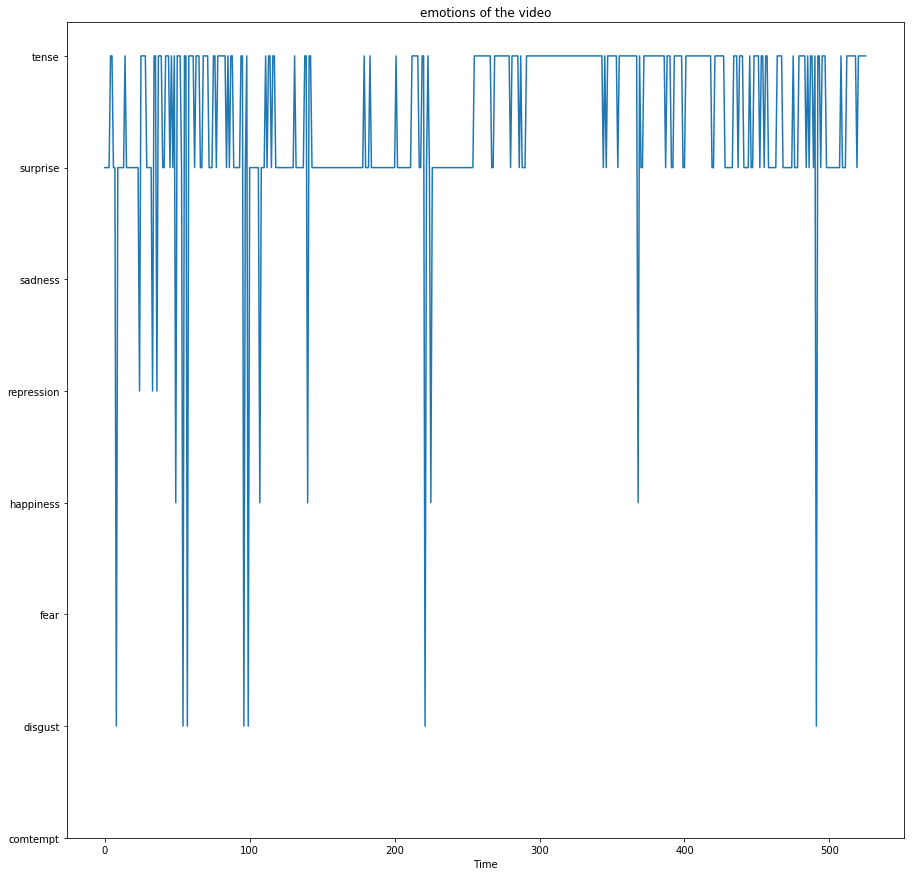

In [49]:
plt.figure(figsize=(15, 15))
plt.plot(emotions)
plt.title("emotions of the video")
plt.xlabel("Time")
plt.yticks(np.arange(8), train_labels)
plt.show()